In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

%matplotlib inline

import matplotlib

/Users/tomas/miniconda2/envs/py27_nb/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('examples/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
print(df.count())
df.head()

ds    2905
y     2905
dtype: int64


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
m = Prophet()
m.fit(df);

In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [3]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [6]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

In [7]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224671,1.198000
2191,2014-02-03,1.901035,1.474798
2532,2015-01-11,1.224671,0.000000
2533,2015-01-12,1.901035,0.000000
2901,2016-01-17,1.224671,0.000000
2902,2016-01-18,1.901035,0.000000
2908,2016-01-24,1.224671,0.000000
2909,2016-01-25,1.901035,0.000000
2922,2016-02-07,1.224671,1.198000
2923,2016-02-08,1.901035,1.474798


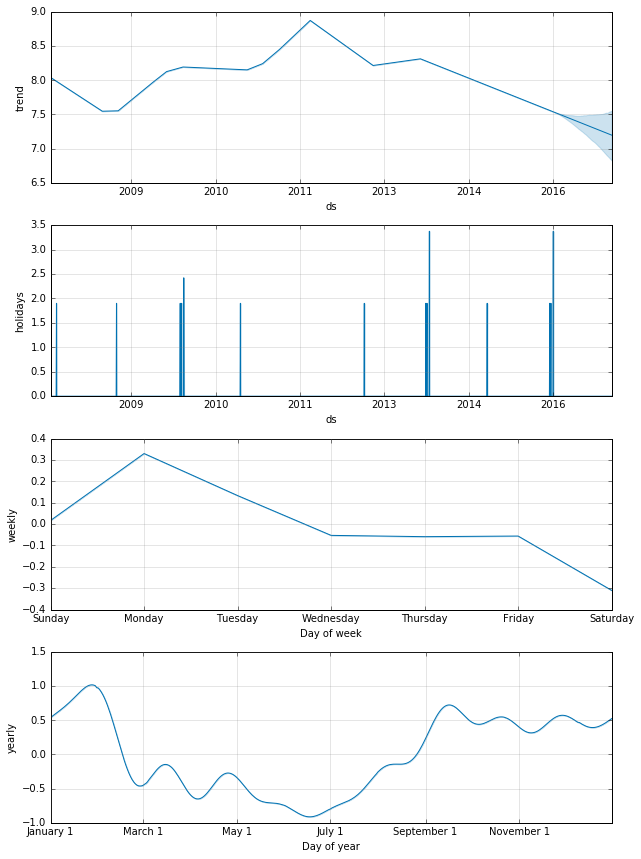

In [8]:
m.plot_components(forecast);

In [9]:
m = Prophet(holidays=holidays, holidays_prior_scale=1).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.317902,0.786721
2191,2014-02-03,1.989285,0.644941
2532,2015-01-11,1.317902,0.000000
2533,2015-01-12,1.989285,0.000000
2901,2016-01-17,1.317902,0.000000
2902,2016-01-18,1.989285,0.000000
2908,2016-01-24,1.317902,0.000000
2909,2016-01-25,1.989285,0.000000
2922,2016-02-07,1.317902,0.786721
2923,2016-02-08,1.989285,0.644941
